### 本课提纲
- 什么是数据分析
- 文件读取
- 一元统计分析
- 二元统计分析
- 练习

### 1. 什么是数据分析

归纳思维是一种重要的理性思考工具，所谓归纳就是观察、实验和调查和问题有关的信息，从中总结概括出一般规律，以帮助解答问题。当我们观察一百次下雨，收集下雨前后时间段的相关信息，例如云层、湿度、温度等数据，就可以归纳出导致下雨的一般规律，并能够预测下雨的可能性。因此，收集分析数据是非常重要的研究手段。

广义的数据分析有四种不同的深度，分别是：描述、解释、预测、控制。描述只是揭示客观事实，例如描述统计历史的下雨的水量最大值、云层厚度平均值等等，解释是解释不同因素的关系，例如云层厚度和下雨水量这两个因素之间的关系是否存在。预测是当前述的多个因素存在关联时，进行预测，例如观察到某时某点的云层厚度，预测后续下雨的水量多少。控制是利用前面发现的关系和预测结果，例如预测到未来下雨水量可能过大，为了避免洪涝，预先干扰云层聚集。

从分析步骤上来看，通常会有几个步骤：
- 先提出一个问题
- 针对这个问题，进行数据收集
- 处理数据成一个表格形式
- 利用统计学方法对数据进行分析，解答问题
- 总结报告

本课内容主要是学习基本的描述性统计分析，也就是说数据是给定现成的，用常规的统计函数来计算汇总。

### 2. 文件读取

本书的配套资料中自带了数据集，可以从data目录中看到有iris.csv文件，这一类文件是一种表格类型的数据文件，每一行之间有回车隔开，每一列之间是逗号隔开，第一行是表头。iris数据是一个历史悠久的数据集，它是由植物学家收集整理得到的关于鸢尾花的数据资料。

不过对于初学者来说，如何在python环境中去找到并读取硬盘目录中对应的文件，还是是一个不容易的事情，所以下面我们仔细来介绍一下如果在notebook环境下去读文。

首先你要确认当前noteboo打开时，当前工作目录的位置是什么，你可以通过cd命令来确认，不同的操作系统，你的显示输出可能不一样。

In [2]:
cd

C:\Users\xccds


然后我们将工作目录转移到本书的目录。

In [4]:
cd AnacondaProjects/book/AI-with-kids/

C:\Users\xccds\AnacondaProjects\book\AI-with-kids


然后可以通过ls命令，看到这个目录下有哪些文件了，其中data目录就是我们存放数据的地方。

In [5]:
ls

 Volume in drive C is Blade
 Volume Serial Number is BEC2-DD53

 Directory of C:\Users\xccds\AnacondaProjects\book\AI-with-kids

2019/11/16  18:57    <DIR>          .
2019/11/16  18:57    <DIR>          ..
2019/11/16  18:57            16,388 .DS_Store
2018/06/05  23:41                66 .gitattributes
2018/06/05  12:13    <DIR>          .ipynb_checkpoints
2019/11/25  11:16    <DIR>          code
2019/05/12  07:19    <DIR>          data
2019/11/25  10:44    <DIR>          edit
2019/11/16  19:17    <DIR>          figures
2019/05/12  07:19             3,441 README.md
2019/11/16  18:57    <DIR>          refence_notebook
               3 File(s)         19,895 bytes
               8 Dir(s)  88,013,885,440 bytes free


可以利用python自带的文件读取功能，即open函数来打开这个文件，文件被打开后可以使用readlines函数来读取文件中的每一行，保存到iris变量中，然后需要通过close来关闭文件。

In [6]:
filename = 'data/iris.csv'
f = open(filename)
iris = f.readlines()
f.close()

In [7]:
iris[:6]

['"sepal_length","sepal_width","petal_length","petal_width","species"\n',
 '5.1,3.5,1.4,.2,"Setosa"\n',
 '4.9,3,1.4,.2,"Setosa"\n',
 '4.7,3.2,1.3,.2,"Setosa"\n',
 '4.6,3.1,1.5,.2,"Setosa"\n',
 '5,3.6,1.4,.2,"Setosa"\n']

此时可以看到iris是一个list，它的第一行是表头，后面各行是对应的数据，不同列之间以逗号分隔。这是一个标准的csv文件的样子。

你可以直接使用列表解析方式来读取文件，就象下面一样。

In [8]:
iris = [line for line in open('data/iris.csv')]

再看一下整体这个列表的长度。

In [9]:
len(iris)

151

可以看到iris这个列表，一共有151行，说明如果不包括表头，就有150条数据。取出前三个元素，就得到了表头，和前两列具体的数字，可以看到有五列，前四列分别是花萼长度和宽度、花瓣长度和宽表，最后一列表示花的种属。还可以观察到不同列之间是逗号间隔，每个元素最后还有一个看起来奇怪的字符“\n”，这是表示了换行符号。

In [10]:
iris[:3]

['"sepal_length","sepal_width","petal_length","petal_width","species"\n',
 '5.1,3.5,1.4,.2,"Setosa"\n',
 '4.9,3,1.4,.2,"Setosa"\n']

我们可以根据前面学到的列表的知识，再用一个列表解析，将这些数据做一些处理，对每一列用strip去除空格回车等符号，再用split进行字符串的分隔，处理后就变成了一个嵌套的列表，也就是说原来列表的每个元素也成为一个列表。

In [8]:
iris_prec = [line.strip().split(',') for line in iris]

In [9]:
iris_prec[:3]

[['"sepal_length"',
  '"sepal_width"',
  '"petal_length"',
  '"petal_width"',
  '"species"'],
 ['5.1', '3.5', '1.4', '.2', '"Setosa"'],
 ['4.9', '3', '1.4', '.2', '"Setosa"']]

### 3. 一元统计分析

一元统计分析就是只看数据的某个列，或者说某单个特征。所以我们先把第一列数据取出来研究一下，所以这里使用了line[0]，因为不需要表头，所以是iris_prec[1:]表示从第二行开始，此外还用float把字符转成了数字，保存在iris_prec_first这个变量中。

In [10]:
iris_prec_first = [float(line[0]) for line in iris_prec[1:]]

In [11]:
iris_prec_first[:3]

[5.1, 4.9, 4.7]

然后我们再将这个数据转成numpy的数组，以方便处理分析。

In [12]:
import numpy as np

In [13]:
iris_one = np.array(iris_prec_first)

我们可以用max函数看一下，这150朵花中，花萼长度最长的是多长？

In [12]:
iris_one.max()

7.9

最短是多长？

In [14]:
iris_one.min()

4.3

平均长度是多长？

In [15]:
iris_one.mean()

5.843333333333334

平均长度衡量了大多数花的长度可能集中在哪个位置附近，但是还需要有一个数字来反映这些数字的分散程度，统计学上通常用标准差来衡量，这个数字越大表示越分散。

In [16]:
iris_one.std()

0.8253012917851409

除了用枯燥的数字来计算这些数据的规律以外，还可以用图形来描述，例如直方图，直方图类似于条状图，它是一种统计汇总方法，对一个连续的数组，先定义一些范围边界，然后看落在这些边界里的数字有多少个，它的作用在于可以看到数据的分布情况。更形象的理解是看作一种排分表，一次全班考试之后，90以上有多少人，80-90之间有多少人，70-80之间有多少人。

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt 

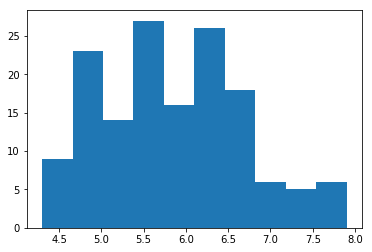

In [18]:
plt.hist(iris_one);

前述的数据读取处理有些麻烦，python中还有一个专门用于数据分析的模块pandas，用它来做分析会更为简单方便。

In [19]:
import pandas as pd

In [20]:
iris = pd.read_csv(filename)

使用head函数可以取出前五行数据进行观察。

In [21]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


iris在此时的数据类型是数据框类型，这是pandas提供的专用于数据分析的数据类型。这种方方正正的表格类的数据，也是大部分数据分析和机器学习会使用的数据类型。在这里我们定义一下常用的数据分析术语。这个数据框的每一行称为一个样本，每一列称为一个特征，像前四个特征都是数值的表示，称为数值特征或连续特征，最后那个species是用字符表示的，称为类别特征或离散特征。

In [22]:
type(iris)

pandas.core.frame.DataFrame

类似的，可以用直方图来绘制出数据的分布情况。

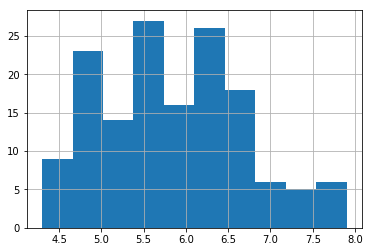

In [23]:
iris.sepal_length.hist();

自然的，pandas也支持计算数据的极值，均值等汇总数字。

In [24]:
iris.sepal_length.max()

7.9

In [25]:
iris.sepal_length.min()

4.3

In [26]:
iris.sepal_length.mean()

5.843333333333335

In [27]:
iris.sepal_length.std()

0.8280661279778629

还可以一次性的计算出四列变量的所有均值，非常方便。

In [28]:
iris.mean()

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

这150个样本中有三种花的种属，我们还可以计算分组后的均值，这种计算称为分类汇总，非常类似于Excel中的透视表这种功能。

In [29]:
iris.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Setosa,5.006,3.428,1.462,0.246
Versicolor,5.936,2.770,4.260,1.326
Virginica,6.588,2.974,5.552,2.026


如果是只计算某一个变量的均值，可以在其中加上方括号进行取子集的操作

In [30]:
iris.groupby('species')['sepal_length'].mean()

species
Setosa        5.006
Versicolor    5.936
Virginica     6.588
Name: sepal_length, dtype: float64

小结：pandas模块是用于数据分析的重要模块，可以使用read_csv来方便的读取本地文件，产生对应的数据类型是数据框。

### 4. 二元统计分析

前述内容是只看单个变量的情况，还可以观察研究两个变量之间的关系，例如画出前两个变量之间的散点图。

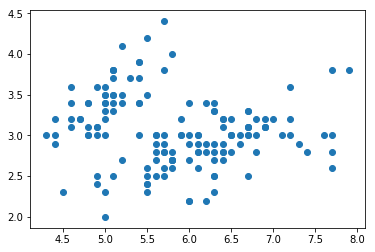

In [31]:
plt.scatter(iris.sepal_length, iris.sepal_width);

看起来这两个变量之间的关系是负相关，我们可以进一步计算相关系数来确认这一点。可以使用numpy模块中的corrcoef函数来计算相关系数，它会返回一个二维数组，我们只需要看非对角线上的值即可，这个-0.11说明这两个特征之间是负的关系。但是这个结论看起来不合理，因为花的长度更大，按道理说宽度也会更大，这种不合常理的结论是为什么呢？

In [32]:
np.corrcoef(iris.sepal_length, iris.sepal_width)

array([[ 1.        , -0.11756978],
       [-0.11756978,  1.        ]])

让我们细分一下，根据种属来分组计算相关系数，可以看到虽然整体相关性为负，但是分组来看，为正

In [33]:
iris.groupby('species').apply(lambda x: np.corrcoef(x.sepal_length, x.sepal_width)[0,1])

species
Setosa        0.742547
Versicolor    0.525911
Virginica     0.457228
dtype: float64

让我们重新来绘制散点图，这次将种属这个变量作为颜色画在图上，非常清晰的看到，分组来看，各组的相关性都是正的。这种结论才是合理正确的。

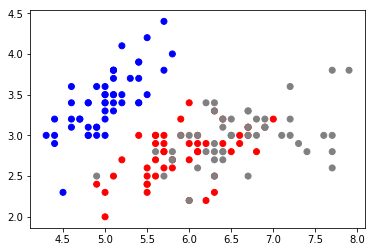

In [34]:
color_list = ['blue']*50 + ['red']*50+ ['grey']*50
plt.scatter(iris.sepal_length, iris.sepal_width,color=color_list);

小结：二元统计分析是研究两个特征之间的关系，相关系数和散点图是一种有用的分析工具；我们还发现，分组后体现出来的规律，在合为整体时可能结论相反，这种现象称为辛普森悖论。

###  练习：

写一个函数来计算相关系数，注意不要使用现有numpy中计算相关系数的函数

In [35]:
def corrcoef(x,y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    cov = np.mean((x-x_mean)*(y-y_mean))
    output = cov/(np.std(x)*np.std(y))
    return output

In [36]:
corrcoef(iris.sepal_length, iris.sepal_width)

-0.11756978413300205

In [11]:
import pandas as pd

In [13]:
weight_height = pd.read_csv("data/weight-height.csv")

In [14]:
weight_height.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [15]:
weight_height.mean()

Height     66.367560
Weight    161.440357
dtype: float64

In [16]:
weight_height.groupby('Gender').mean()

,Height,Weight
Gender,,
Female,63.708774,135.860093
Male,69.026346,187.020621


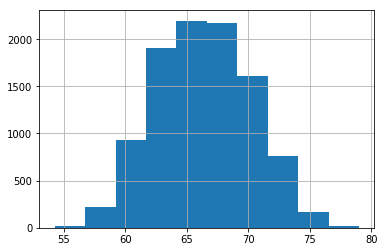

In [19]:
weight_height.Height.hist();

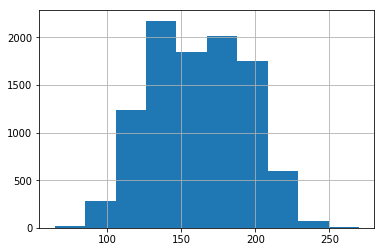

In [20]:
weight_height.Weight.hist();

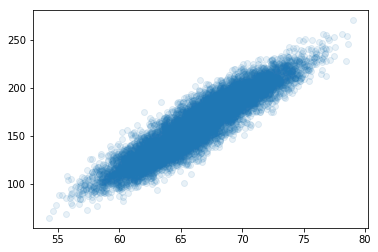

In [24]:
plt.scatter(weight_height.Height,weight_height.Weight,alpha=0.1);

### 本课小结：
- 数据分析是一种从数据中进行归纳总结的思维方式，数据越多越典型，分析出的结论越正确。
- 一维的分析是观察一个特征本身的各种统计特点，例如均值、标准差、分布，二维的分析是观察两个特征之间的相关关系。
- pandas模块是重要的数据分析模块，非常方便。
- 简单的将分组数据相加汇总，并不总是反映真实情况，这种称为辛普森悖论。